Null Hypo=H0: there is a negative correlation or no correlation between increasing of age and the decreasing of the time of trip.
Alternative Hypo=H1: there is positive relationship between increasing of age and the decreasing of the time of trip.
    Significance level: 0.05


In [12]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
from  scipy import stats


%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")


Populating the interactive namespace from numpy and matplotlib


In [8]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  16.0M      0  0:00:01  0:00:01 --:--:-- 18.6M


In [9]:
get_ipython().system('unzip 201601-citibike-tripdata.zip')

Archive:  201601-citibike-tripdata.zip
replace 201601-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [13]:
df=pd.read_csv('201601-citibike-tripdata.zip')

In [14]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [15]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [16]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
        'gender'], axis=1, inplace=1)

In [17]:
df.head()

,tripduration,birth year
0,923,1958.0
1,379,1969.0
2,589,1982.0
3,889,1961.0
4,1480,1952.0


we are taking birth year to calculate the age and trip duration.

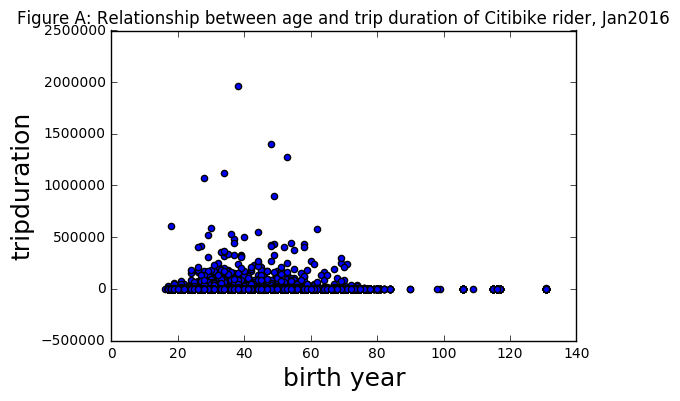

In [47]:
df['age'] = (2016 - df['birth year'])
X = df['age']
y = df['tripduration']
plt.scatter(X, y)
pl.xlabel('birth year', fontsize = 18)
pl.ylabel('tripduration', fontsize = 18)
pl.title("Figure A: Relationship between age and trip duration of Citibike rider, Jan2016")
pl.show()


In [20]:
df['age'].dropna(inplace= True)
df['tripduration'].dropna(inplace= True)


In [21]:
array1 = df['age'].dropna().values

In [22]:
array2 = df['tripduration'].dropna().values

In [23]:
len(array2)

509478

In [24]:
len(array1)

484933

In [25]:
array3 = np.random.choice( array2, 484933, replace= False )

In [26]:
array1=  sorted(array1, key=int)
array1

[16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0,

In [27]:
array3 = sorted(array3, key=int)
array3

[61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 65,
 65,
 65,
 65,
 65,
 65,
 65,


In [29]:
prsn = stats.pearsonr(array3, array1)
print(prsn)

(0.19530646567508073, 0.0)


In [ ]:
#def downloadbuildingsize():
print ("Downloading")
#https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip
#os.system("curl -O https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip")
#os.system ("mv " + "201507-citibike-tripdata.zip " + os.getenv("PUIDATA"))

In [ ]:
print("curl -O https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip")

In [ ]:
print ("mv " + "201507-citibike-tripdata.zip " + os.getenv("PUIDATA"))

In [ ]:
print ("unzip" + os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

In [ ]:

#os.system("mv " + "mn_mappluto_16v1.zip" + os.getenv("PUIDATA")
os.system("unzip" + os.getenv("PUIDATA") + "/201507-citibike-tripdata.zip")

In [30]:
df1 = pd.read_csv( '201507-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [31]:
df1.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
        'gender'], axis=1, inplace=1)

In [32]:
df1.columns

Index(['tripduration', 'birth year'], dtype='object')

In [33]:
df1['age']= 2015 - df1['birth year']

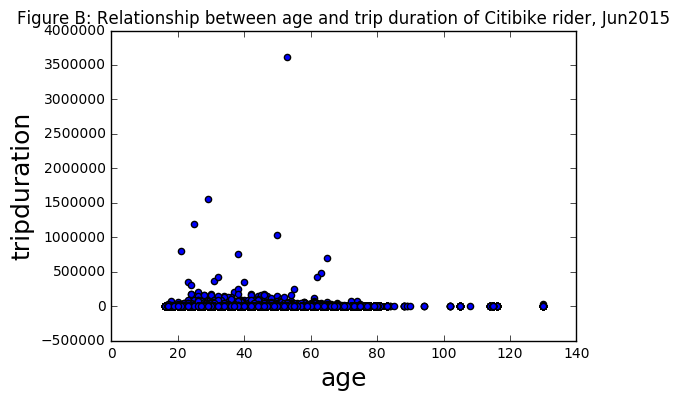

In [49]:
X1 = df1['age']
y1 = df1['tripduration']
plt.scatter(X1, y1)
pl.title('Figure B: Relationship between age and trip duration of Citibike rider, Jun2015')
pl.xlabel('age', fontsize = 18)
pl.ylabel('tripduration', fontsize = 18)

In [35]:
array4= df1['age'].dropna().values
array5 = df1['tripduration'].dropna().values

In [36]:
len(array4)

905311

In [37]:
len(array5)

1085676

In [43]:
array6 = np.random.choice( array5, 905311, replace= False )

In [44]:
len(array6)

905311

In [45]:
array4 = sorted(array4, key=int)
array6 = sorted(array6, key=int)
array6

[60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,


In [46]:
prsn = stats.pearsonr(array4, array6)
print(prsn)

(0.14380068554834852, 0.0)
